In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path
from pathlib import Path  

#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#list of all drugs excluding four drugs
drug_list = [
    "Trastuzumab",
    "Tideglusib",
    "Lapatinib",
    "Mirdametinib",
    "MK-2206",
    "Nintedanib",
    "Pertuzumab",
    "Pictilisib",
    "Refametinib",
    "Rituximab",
    "Romidepsin",
    "Selumetinib",
    "SHP099 dihydrochloride",
    "Staurosporine",
    "A485",
    "Afatinib",
    "AZD-4547",
    "AZD-8055",
    "Bortezomib",
    "Carfilzomib",
    "CUDC-101",
    "Curcumin",
    "Cytarabine",
    "Dactolisib",
    "Dasatinib",
    "Gefitinib",
    "Imatinib"
]


In [6]:
# only down regulation for now 05/17
pd.reset_option('^display.', silent=True)
column_names = ['Gene Name']
drug_table = pd.DataFrame(columns = column_names)

for i in range(len(drug_list)):
    drug = drug_list[i]
    drug_file_name = drug + "_ddPTM_aggregated.csv"
    drug_file_path = path.join("/Users/louxuwen/Desktop/Documents/GitHub/SP23-BENG213/Project/Map Gene to KEGG Pathway/RAW_DATA/", drug_file_name)
    
    data_raw = pd.read_csv(drug_file_path)
    data_raw['Gene Name'].dropna(inplace=True)
    
    data_raw=data_raw[data_raw['Modification Type'] == 'Phospho']
    data_raw = data_raw.loc[data_raw['Regulation'] == "down"]
    data_raw= data_raw[['Gene Name',"Uniprot","Protein Name",'Cell Line', 'Duration',"Max -Log10(EC50)"]]
    
    #group by genes and take the mean across cell type and duration
    data_raw=data_raw.groupby(by ='Gene Name').mean()
    
    #rename the average fold change column to just the drug name 
    data_raw.rename(columns = {"Gene Name":'Gene Name',"Max -Log10(EC50)":drug},inplace=True)
    #print(data_raw)
    #merge the individual drug data frames into a single larger one
    drug_table = drug_table.merge(data_raw,how ='outer', on = 'Gene Name')
 
    
drug_table.fillna(0,inplace=True)

#for col in drug_table.columns:
#    if col == 'Gene Name':
#        continue
#    drug_table[col] = drug_table[col].replace(0,0.01)
#    drug_table[col] = np.log2(drug_table[col])

drug_table.set_index('Gene Name')

Trastuzumab  Tideglusib  Lapatinib  Mirdametinib   MK-2206  \
Gene Name                                                               
ABCF1        -3.746832         0.0   6.820852           0.0  0.000000   
ACACA        -4.586700         0.0   0.000000           0.0  0.000000   
AFF4         -4.737547         0.0   6.341536           0.0  7.536074   
AFTPH        -4.966038         0.0   0.000000           0.0  0.000000   
ANK3         -4.739443         0.0   0.000000           0.0  0.000000   
...                ...         ...        ...           ...       ...   
CHD2          0.000000         0.0   0.000000           0.0  0.000000   
GRB2          0.000000         0.0   0.000000           0.0  0.000000   
PLEKHA4       0.000000         0.0   0.000000           0.0  0.000000   
SH2D1B        0.000000         0.0   0.000000           0.0  0.000000   
SYNE2         0.000000         0.0   0.000000           0.0  0.000000   

           Nintedanib  Pertuzumab  Pictilisib  Refametinib  Rituximab  ...  \
Gene Name                                                              ...   
ABCF1        0.000000    0.000000     0.00000          0.0   0.000000  ...   
ACACA        0.000000    0.000000     0.00000          0.0   0.000000  ...   
AFF4         4.954584   -4.586769     6.98859          0.0  -2.625817  ...   
AFTPH        0.000000    0.000000     0.00000          0.0   0.000000  ...   
ANK3         0.000000    0.000000     0.00000          0.0   0.000000  ...   
...               ...         ...         ...          ...        ...  ...   
CHD2         0.000000    0.000000     0.00000          0.0   0.000000  ...   
GRB2         0.000000    0.000000     0.00000          0.0   0.000000  ...   
PLEKHA4      0.000000    0.000000     0.00000          0.0   0.000000  ...   
SH2D1B       0.000000    0.000000     0.00000          0.0   0.000000  ...   
SYNE2        0.000000    0.000000     0.00000          0.0   0.000000  ...   

           AZD-8055  Bortezomib  Carfilzomib  CUDC-101  Curcumin  Cytarabine  \
Gene Name                                                                      
ABCF1      0.000000    8.405186     8.423112       0.0       0.0         0.0   
ACACA      0.000000    0.000000     0.000000       0.0       0.0         0.0   
AFF4       8.367277    8.022652     7.801668       0.0       0.0         0.0   
AFTPH      0.000000    7.838431     7.805457       0.0       0.0         0.0   
ANK3       0.000000    0.000000     0.000000       0.0       0.0         0.0   
...             ...         ...          ...       ...       ...         ...   
CHD2       0.000000    0.000000     0.000000       0.0       0.0         0.0   
GRB2       0.000000    0.000000     0.000000       0.0       0.0         0.0   
PLEKHA4    0.000000    0.000000     0.000000       0.0       0.0         0.0   
SH2D1B     0.000000    0.000000     0.000000       0.0       0.0         0.0   
SYNE2      0.000000    0.000000     0.000000       0.0       0.0         0.0   

           Dactolisib  Dasatinib  Gefitinib  Imatinib  
Gene Name                                              
ABCF1        0.000000   0.000000   0.000000  0.000000  
ACACA        0.000000   5.502117   6.555864  0.000000  
AFF4         8.394113   6.044637   0.000000  0.000000  
AFTPH        0.000000   6.415482   0.000000  0.000000  
ANK3         0.000000   0.000000   0.000000  0.000000  
...               ...        ...        ...       ...  
CHD2         0.000000   0.000000   0.000000  8.550282  
GRB2         0.000000   0.000000   0.000000  6.641596  
PLEKHA4      0.000000   0.000000   0.000000  5.660320  
SH2D1B       0.000000   0.000000   0.000000  6.097079  
SYNE2        0.000000   0.000000   0.000000  4.804533  

[3418 rows x 27 columns]

In [7]:
filepath = Path('/Users/louxuwen/Desktop/Documents/GitHub/SP23-BENG213/Project/Map Gene to KEGG Pathway/down_data_matrix.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
drug_table.to_csv(filepath)  

In [192]:
import scipy
clustering =scipy.cluster.hierarchy.linkage(drug_table.iloc[:,1:], method='complete')

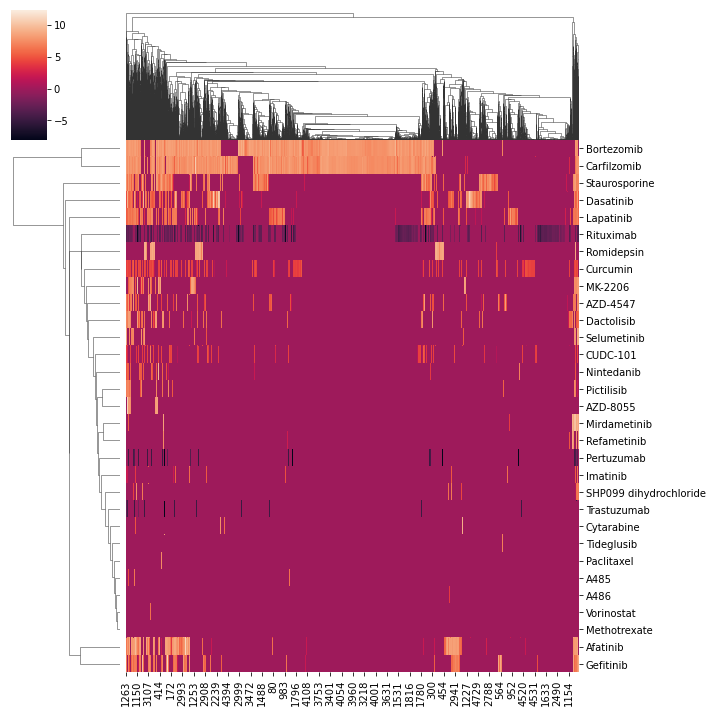

In [195]:
sns.clustermap(drug_table.iloc[:,1:].T)